In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('GR+LRTests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [3]:
print(data['var'])
print()
for key in data['order']:
    print(key)
print()
for key in data['data'][list(data['data'].keys())[0]].keys():
    print(key)

{'clusteringOn': ['false', 'true'], 'clusterSearchThresh': [0, 5, 25], 'CHTimeThresh': [300, 600, 900], 'globalRecluster': [0, 1], 'CHBatteryDropThresh': [0.2, 0.3], 'reclusterThreshold': [0.025, 0.05, 0.1], 'localRecluster': [0, 1, 2, 63], 'disableGRThresh': [0, 0.7], 'GRIncrement': [1.5, 1.75], 'largeImprovement': [0.6, 0.8], 'smallImprovement': [0.2, 0.35, 0.5, 0.65]}

CHTimeThresh
CHBatteryDropThresh
localRecluster
smallImprovement
disableGRThresh
clusterSearchThresh
GRIncrement
globalRecluster
largeImprovement
reclusterThreshold
clusteringOn

Samples
Recluster threshold
Alone nodes
# False Positive Rejections
Average Battery
# False Positives
Bluetooth
Alive valid nodes
Local Reclusters
BTClusterSearch
Clusters above thresh
# True Positive Rejections
# False Negatives
# False Negatives Drift
Wifi
Avg cluster size
Min Battery
# True Positive = Rejections
True Positive Findings
Detection Time
BTReadings
BTGlobalRecluster
Max Battery
Global reclusters
CS Joins
# Total False Negatives

In [4]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'CS', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh'}

In [5]:
i = 0
print(len(data['data'].keys()))

97


In [6]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            for ignoreKey in ignoreDict[ind]:
                if key[ind] == ignoreKey:
                    ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [7]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(currentLevel-separationLevel):
                if titleArr[i] in inputDict:
                    label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

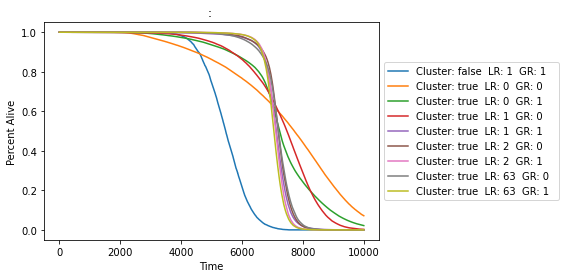

In [12]:
Alive = compareOverTime('Percent Alive', [10,2,7])
generateOverTimeGraphs(Alive, 0)

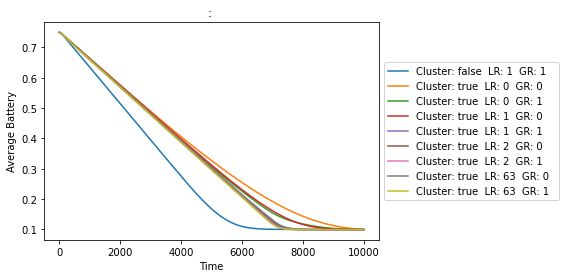

In [13]:
AvgBattery = compareOverTime('Average Battery', [10,2,7])
generateOverTimeGraphs(AvgBattery, 0)

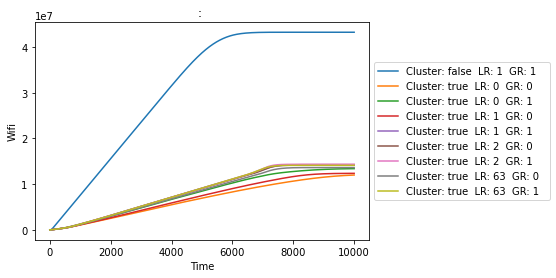

In [14]:
Wifi = compareOverTime('Wifi', [10,2,7])
generateOverTimeGraphs(Wifi, 0)

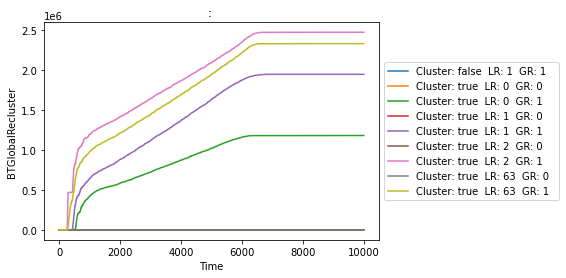

In [17]:
BTGlobalRecluster = compareOverTime('BTGlobalRecluster', [10,2,7])
generateOverTimeGraphs(BTGlobalRecluster, separationLevel=0)

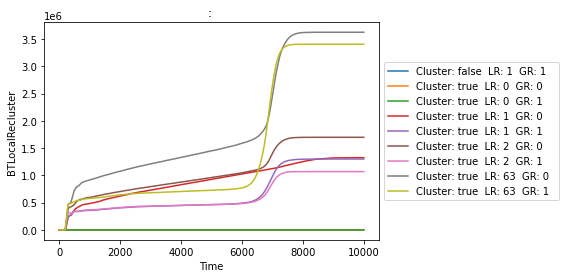

In [18]:
BTLocalRecluster = compareOverTime('BTLocalRecluster', [10,2,7])
generateOverTimeGraphs(BTLocalRecluster, separationLevel=0)

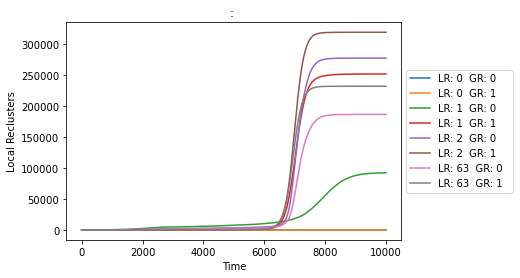

In [20]:
LRs = compareOverTime('Local Reclusters', [2,7], {10:['false']})
generateOverTimeGraphs(LRs, separationLevel=0)

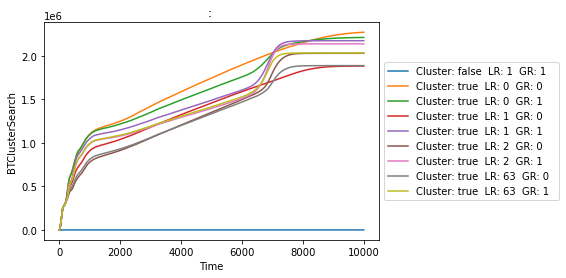

In [21]:
BTClusterSearch = compareOverTime('BTClusterSearch', [10,2,7])
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

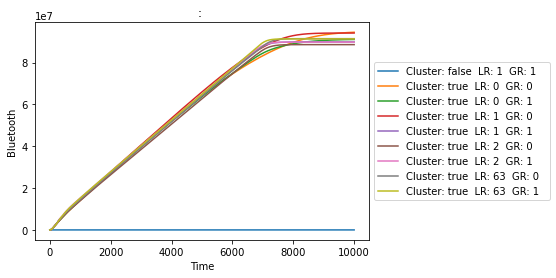

In [22]:
BT = compareOverTime('Bluetooth', [10,2,7])
generateOverTimeGraphs(BT, separationLevel=0)

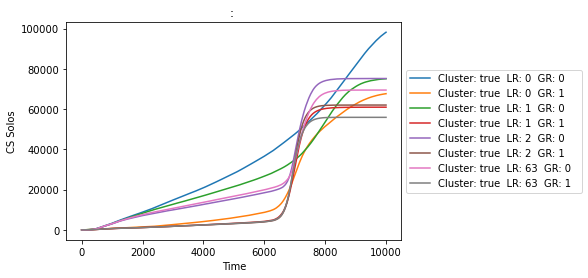

In [23]:
CSSolos = compareOverTime('CS Solos', [10,2,7], {10:['false']})
generateOverTimeGraphs(CSSolos, separationLevel=0)

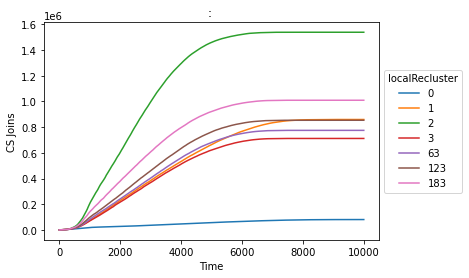

In [24]:
CSJoins = compareOverTime('CS Joins', [3], {2:['false']})
generateOverTimeGraphs(CSJoins, separationLevel=0)

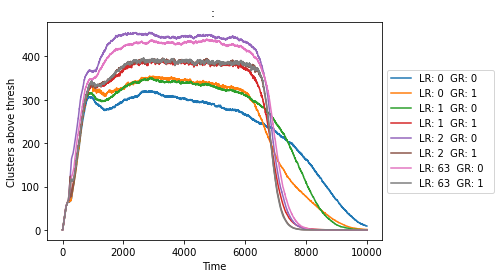

In [27]:
above = compareOverTime('Clusters above thresh', [2,7], {10:['false']})
generateOverTimeGraphs(above, separationLevel=0)

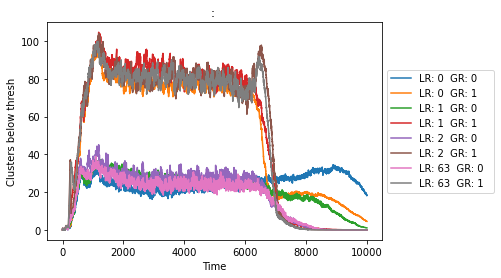

In [28]:
below = compareOverTime('Clusters below thresh', [2,7], {10:['false'], 0:[-1]})
generateOverTimeGraphs(below, separationLevel=0)

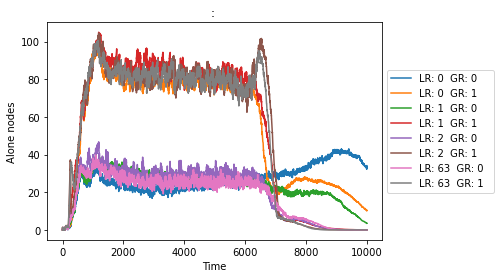

In [29]:
alone = compareOverTime('Alone nodes', [2,7], {10:['false']})
generateOverTimeGraphs(alone, separationLevel=0)

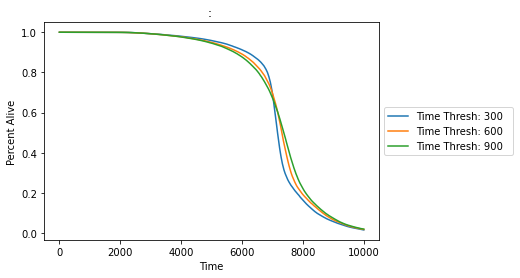

In [9]:
Alive = compareOverTime('Percent Alive', [0], {10:['false'], 7:[1]})
generateOverTimeGraphs(Alive, 0)

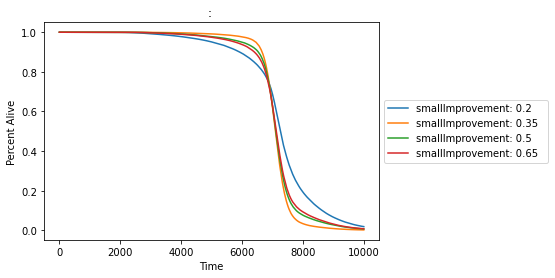

In [47]:
Alive = compareOverTime('Percent Alive', [3], {10:['false']})
generateOverTimeGraphs(Alive, 0)

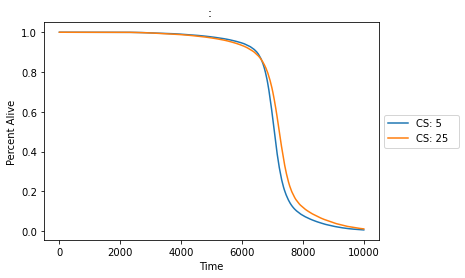

In [49]:
Alive = compareOverTime('Percent Alive', [5], {10:['false']})
generateOverTimeGraphs(Alive, 0)